## exe1) 학생 키에 대한 두 집단 비교

In [1]:
import numpy as np
from scipy import stats

In [2]:
# 데이터 생성
# randint : 범위 지정 랜덤 데이터 생성
# 최소값 157 ~ 최대값 178 까지 범위 중 size 20개 생성
group1Heights = np.random.randint(low = 157, high = 178, size = 20)
print('group1Heights = ', group1Heights)

group2Heights = np.random.randint(low = 162, high = 182, size = 20)
print('group2Heights = ', group2Heights)

group1Heights =  [177 160 169 166 166 167 163 164 173 162 176 170 166 173 159 167 177 161
 159 158]
group2Heights =  [169 168 168 177 163 171 180 168 170 169 174 177 163 164 167 174 168 162
 175 176]


In [3]:
# 검증하기(Independent Samples t-test)
# stats.ttest_ind(기준집단, 관측집단)
tResult = stats.ttest_ind(group1Heights, group2Heights)

print('서로 다른 두 집단 평균 검정(독립t표본검정) = ', tResult)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult))

서로 다른 두 집단 평균 검정(독립t표본검정) =  Ttest_indResult(statistic=-1.9476901351399283, pvalue=0.05886806173457992)
t-검정 통계량 = -1.948, p-value = 0.059


In [4]:
print(group1Heights.mean(), group2Heights.mean())

166.65 170.15


In [ ]:
'''
1. p-value = 0.059 > 0.05 이므로, 귀무가설 기각할 수 없음
2. 귀무가설 채택 : 두 집단의 관측값 평균은 서로 같다고 할 수 있음(평균 차이가 없다.)
'''

## exe2) 남녀 두 집단간 파이썬 시험의 평균차이 검정
- H0 : 남녀 두 집단간 파이썬 시험의 평균에 차이가 없다.
- H1 : 남녀 두 집단간 파이썬 시험의 평균에 차이가 있다.

In [5]:
import numpy as np
import scipy.stats as stats

In [6]:
# 데이터 생성
male = [75, 85, 100, 72.5, 86.5]
female = [63.2, 76, 52, 100, 70]

In [7]:
# 두 집단 검증
tResult2 = stats.ttest_ind(male, female)

print('서로 다른 두 집단 평균 검정(독립t표본검정) = ', tResult2)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult2))

서로 다른 두 집단 평균 검정(독립t표본검정) =  Ttest_indResult(statistic=1.233193127514512, pvalue=0.2525076844853278)
t-검정 통계량 = 1.233, p-value = 0.253


In [ ]:
'''
1. p-value = 0.253 > 0.05 이므로, 귀무가설 기각할 수 없음
2. 귀무가설 채택 : 두 집단의 관측값 평균은 서로 같다고 할 수 있음(남녀간 파이썬 시험의 평균에 차이가 없다.)
'''

## exe3) 두가지 교육방법에 따른 평균학점에 대한 차이 검정 수행 (two_sample.csv)
- H0 : 두 교육방법에 따른 평균학점에는 차이가 없다
- H1 : 두 교육방법에 따른 평균학점에는 차이가 있다

In [9]:
# 데이터 가져오기
import pandas as pd
two_sample = pd.read_csv('./data/two_sample.csv')
two_sample

,교육방법,학점
0,1,4.4
1,1,3.8
2,1,4.2
3,1,4.0
4,1,NaN
5,1,4.1
6,1,NaN
7,1,3.9
8,1,3.7
9,1,3.9


In [39]:
# 교육방법 1과 2 추출하세요
# 교육방법1에 대한 데이터 변수 : m1
# 교육방법2 대한 데이터 변수 : m2

m1 = two_sample[two_sample['교육방법']==1].reset_index(drop=True)
m2 = two_sample[two_sample['교육방법']==2].reset_index(drop=True)

In [40]:
# 교육방법1에 대한 학점만 추출한 데이터 변수 : scor1
# 교육방법2에 대한 학점만 추출한 데이터 변수 : scor2

scor1 = m1['학점']
scor2 = m2['학점']

In [41]:
# 결측치 처리
scor1 = scor1.fillna(scor1.mean())
scor2 = scor2.fillna(scor2.mean())

#### 정규성 검증

In [43]:
# 정규성 검증
resultSh1 = stats.shapiro(scor1)
print('정규성 검정 결과 = ', resultSh1)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(resultSh1))

정규성 검정 결과 =  ShapiroResult(statistic=0.9615016579627991, pvalue=0.8028513789176941)
t-검정 통계량 = 0.962, p-value = 0.803


In [44]:
resultSh2 = stats.shapiro(scor2)
print('정규성 검정 결과 = ', resultSh2)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(resultSh2))

정규성 검정 결과 =  ShapiroResult(statistic=0.9173869490623474, pvalue=0.3356756865978241)
t-검정 통계량 = 0.917, p-value = 0.336


In [ ]:
'''
두 집단 모두 p-value > 0.05 이므로, 귀무가설 기각할 수 없음. 정규성을 만족한다 할 수 있음 
'''

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 5

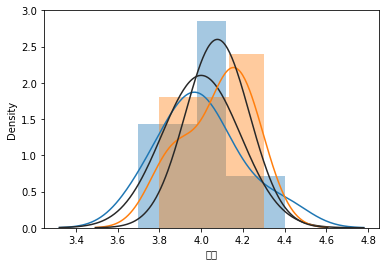

In [45]:
# 정규분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 처리
plt.rc('font', family = 'Malgun Gothioc')

sns.distplot(scor1, fit=stats.norm)
sns.distplot(scor2, fit=stats.norm)b
plt.show()

#### 등분산성 검증

In [46]:
# 등분산성 검증
# H0 : 두 집단간 분산이 동일하다 (p-value > 0.05)
# H1 : 두 집단간 분산이 동일하지 않다 

# 등분산성 검증은 3가지 방법으로 진행됩니다
#  1. 레빈(levene)
#  2. 플리그너(fligner)
#  3. 바틀렛(bartlett)

sLevene = stats.levene(scor1, scor2)

print('등분산성 levene 검증결과 =', sLevene)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sLevene))

# 1. p-value = 0.742 > 0.05 이므로, 귀무가설 기각할 수 없음
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족

등분산성 levene 검증결과 = LeveneResult(statistic=0.11149825783972156, pvalue=0.7423035272233627)
t-검정 통계량 = 0.111, p-value = 0.742


In [47]:
sFligner = stats.fligner(scor1, scor2)

print('등분산성 fligner 검증결과 =', sFligner)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sFligner))

# 1. p-value = 0.923 > 0.05 이므로, 귀무가설 기각할 수 없음
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족

등분산성 fligner 검증결과 = FlignerResult(statistic=0.009351524793910174, pvalue=0.9229620332079382)
t-검정 통계량 = 0.009, p-value = 0.923


In [49]:
sBartlett = stats.bartlett(scor1, scor2)

print('등분산성 bartlett 검증결과 =', sBartlett)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sBartlett))

# 1. p-value = 0.923 > 0.05 이므로, 귀무가설 기각할 수 없음
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족

등분산성 bartlett 검증결과 = BartlettResult(statistic=0.38065029633127184, pvalue=0.5372554141124455)
t-검정 통계량 = 0.381, p-value = 0.537


In [51]:
# 두 집단 검증
# equal_var : 정규성과 등분산성 모두를 만족하는 경우 작성
tResult3 = stats.ttest_ind(scor1, scor2, equal_var = True)

print('서로 다른 두 집단 평균 검정(독립t표본검정) = ', tResult3)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult3))

서로 다른 두 집단 평균 검정(독립t표본검정) =  Ttest_indResult(statistic=-0.9561271382392642, pvalue=0.3516741458629946)
t-검정 통계량 = -0.956, p-value = 0.352


In [ ]:
''' 해석(검증결과)
1. p-value = 0.352 > 0.05 이므로, 귀무가설 기각할 수 없음
2. 귀무가설 채택 : 두 집단의 관측값 평균은 서로 같다고 할 수 있음(두 교육방법에 따른 평균학점의 차이가 없다.)
'''

## exe4) 어느 음식점의 매출자료와 날씨자료를 이용하여 강수여부에 따른 매출 차이에 대하여 분석
- H0 : 강수여부에 따른 매출액 평균에 차이가 없다
- H1 : 강수여부에 따른 매출액 평균에 차이가 있다


- 집단1: 비가 올때의 매출, 집단2: 비가 안올때의 매출

In [52]:
# 사용 라이브러리
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 매출 데이터 : tsales.csv
#  YMD : 날짜, AMT : 매출

# 날씨 데이터 : tweather.csv
#  tm : 날짜, sumRn : 강수량

In [118]:
# 데이터 불러오기(불러오면서 자료형 형식 변경)
sales_data = pd.read_csv('./data/tsales.csv', dtype = {'YMD':'object'})
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   YMD     328 non-null    object
 1   AMT     328 non-null    int64 
 2   CNT     328 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.8+ KB


In [53]:
# 매출데이터
tsales = pd.read_csv('./data/tsales.csv')
tsales

,YMD,AMT,CNT
0,20190514,0,1
1,20190519,18000,1
2,20190521,50000,4
3,20190522,125000,7
4,20190523,222500,13
...,...,...,...
323,20200424,1092500,51
324,20200425,672500,34
325,20200426,1123500,55
326,20200427,819500,45


In [119]:
# 날씨데이터
tweather = pd.read_csv('./data/tweather.csv')
tweather

,stnId,tm,avgTa,minTa,maxTa,sumRn,maxWs,avgWs,ddMes
0,108,2018-06-01,23.8,17.5,30.2,0.0,4.3,1.9,0.0
1,108,2018-06-02,23.4,17.6,30.1,0.0,4.5,2.0,0.0
2,108,2018-06-03,24.0,16.9,30.8,0.0,4.2,1.6,0.0
3,108,2018-06-04,22.6,18.9,27.5,0.0,4.4,1.9,0.0
4,108,2018-06-05,23.7,17.7,29.2,0.0,4.0,1.7,0.0
...,...,...,...,...,...,...,...,...,...
697,108,2020-04-28,13.9,7.8,19.9,0.0,5.5,3.0,0.0
698,108,2020-04-29,14.9,9.3,21.0,0.0,5.2,2.6,0.0
699,108,2020-04-30,17.1,9.3,23.4,0.0,5.9,2.7,0.0
700,108,2020-05-01,20.2,16.4,26.2,0.0,5.5,2.7,0.0


In [106]:
tsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   YMD     328 non-null    int64
 1   AMT     328 non-null    int64
 2   CNT     328 non-null    int64
dtypes: int64(3)
memory usage: 7.8 KB


In [107]:
# 매출데이터 자료형 변환
tsales['YMD']= tsales['YMD'].astype('str')

In [97]:
# tweather['tm'] = tweather['tm'].str.replace('-','')

a = []
for i in range(len(tweather['tm'])) :
    a.append(tweather['tm'][i].replace("-", "",))
    
tweather['n_tm'] = a

In [102]:
tweather['n_tm']

0      20180601
1      20180602
2      20180603
3      20180604
4      20180605
         ...   
697    20200428
698    20200429
699    20200430
700    20200501
701    20200502
Name: n_tm, Length: 702, dtype: object

In [109]:
# 데이터 합치기
# tsales.merge(left_on='YMD', right_on='n_tm', how='left')
data = pd.merge(tsales,tweather, left_on='YMD', right_on='n_tm', how='inner')
data

,YMD,AMT,CNT,stnId,tm,avgTa,minTa,maxTa,sumRn,maxWs,avgWs,ddMes,n_tm
0,20190514,0,1,108,2019-05-14,19.6,12.9,26.9,0.0,4.1,1.6,0.0,20190514
1,20190519,18000,1,108,2019-05-19,19.4,17.9,21.6,22.0,2.7,1.2,0.0,20190519
2,20190521,50000,4,108,2019-05-21,17.2,11.7,23.8,0.0,5.9,2.9,0.0,20190521
3,20190522,125000,7,108,2019-05-22,19.5,12.3,26.5,0.0,5.4,2.4,0.0,20190522
4,20190523,222500,13,108,2019-05-23,22.1,15.0,29.2,0.0,3.5,1.7,0.0,20190523
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,20200424,1092500,51,108,2020-04-24,9.9,4.1,14.3,0.0,8.2,3.9,0.0,20200424
324,20200425,672500,34,108,2020-04-25,13.1,9.9,17.1,0.0,7.8,3.9,0.0,20200425
325,20200426,1123500,55,108,2020-04-26,12.3,6.8,19.0,0.0,6.5,3.2,0.0,20200426
326,20200427,819500,45,108,2020-04-27,12.9,8.7,18.3,0.0,5.5,2.8,0.0,20200427


In [111]:
# no_rain = data[data['sumRn'] != 0]
# rain = data[data['sumRn'] == 0]

In [122]:
## solution

# 원핫인코딩
data['rain_yn'] = (data['sumRn']>0).astype(int)

# 비가 안올때 매출값 추출
rainNAMT = data[(data['rain_yn']==0)]['AMT']
rainNAMT = rainNAMT.reset_index(drop=True)

# 비가 올때 매출값 추출
rainAMT = data[(data['rain_yn']==1)]['AMT']
rainAMT = rainAMT.reset_index(drop=True)

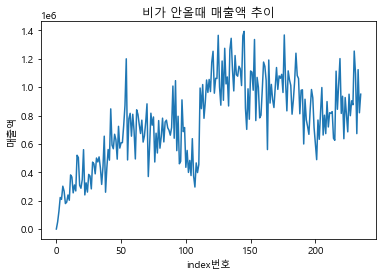

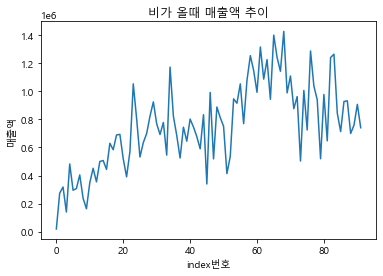

In [126]:
plt.rc('font', family = 'Malgun Gothic')

plt.plot(rainNAMT)
plt.title('비가 안올때 매출액 추이')
plt.xlabel('index번호')
plt.ylabel('매출액')
plt.show()

plt.plot(rainAMT)
plt.title('비가 올때 매출액 추이')
plt.xlabel('index번호')
plt.ylabel('매출액')
plt.show()

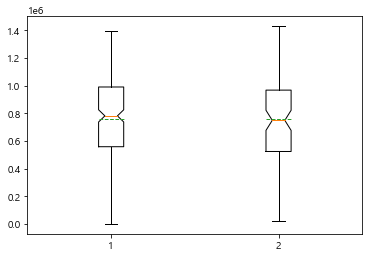

In [127]:
# 평균(중앙점) 추이 분석 - 박스플롯
plt.boxplot([rainNAMT,rainAMT],
           meanline = True,
           showmeans = True,
           notch = True)
plt.show()

In [130]:
# 정규성 검증
resultSh1 = stats.shapiro(rainNAMT)
print('정규성 검정 결과 = ', resultSh1)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(resultSh1))

# 정규성 만족

정규성 검정 결과 =  ShapiroResult(statistic=0.9884955883026123, pvalue=0.056049469858407974)
t-검정 통계량 = 0.988, p-value = 0.056


In [131]:
resultSh2 = stats.shapiro(rainAMT)
print('정규성 검정 결과 = ', resultSh2)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(resultSh2))

# 정규성 만족

정규성 검정 결과 =  ShapiroResult(statistic=0.9924222826957703, pvalue=0.882739782333374)
t-검정 통계량 = 0.992, p-value = 0.883


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


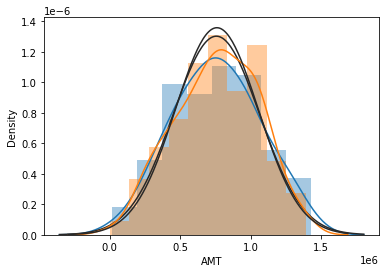

In [128]:
# 정규분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 처리
plt.rc('font', family = 'Malgun Gothioc')

sns.distplot(rainAMT, fit=stats.norm)
sns.distplot(rainNAMT, fit=stats.norm)
plt.show()

In [132]:
# 등분산성 검증
sLevene = stats.levene(rainAMT, rainNAMT)

print('등분산성 levene 검증결과 =', sLevene)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(sLevene))

# 1. p-value = 0.712 > 0.05 이므로, 귀무가설 기각할 수 없음
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족

등분산성 levene 검증결과 = LeveneResult(statistic=0.13618283405945808, pvalue=0.7123452333011173)
t-검정 통계량 = 0.136, p-value = 0.712


In [133]:
# 두 집단 검증
tResult4 = stats.ttest_ind(rainAMT, rainNAMT, equal_var = True)

print('서로 다른 두 집단 평균 검정(독립t표본검정) = ', tResult4)
print('t-검정 통계량 = %.3f, p-value = %.3f' %(tResult4))

서로 다른 두 집단 평균 검정(독립t표본검정) =  Ttest_indResult(statistic=-0.10109828602924716, pvalue=0.919534587722196)
t-검정 통계량 = -0.101, p-value = 0.920


In [ ]:
''' 해석(검증결과)
1. p-value = 0.920 > 0.05 이므로, 귀무가설 기각할 수 없음
2. 귀무가설 채택 : 두 집단간 평균 차이는 없다(강수여부에 따라 매출액에 차이가 없다)
'''